# Gaussian convolution using Gauss-Hermite quadrature

In [1]:
import numpy.polynomial.hermite as hermite
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
x, w = hermite.hermgauss(200)
t = np.linspace(-5,5,1000)
dt = t[1] - t[0]

We can write the convolution between the induced current $i$ and a Gaussian $G$ as:
\begin{equation}
i(t')*G(t',t_0,\sigma_t)=\frac{1}{\sqrt{2\pi}\sigma_t}\int^{+\infty}_{-\infty}e^{-\frac{(t-t_0)^2}{2\sigma_t^2}}i(t'-t)dt.
\end{equation}
Gauss-Hermite quadrature can be used for integrals in the form:
\begin{equation}
\int^{+\infty}_{-\infty}e^{-x^2}f(x)dx \approx \sum^n_{i=1}w_i f(x_i).
\end{equation}

In our case, we can define:
\begin{equation}
\frac{t-t_0}{\sqrt{2}\sigma_t} = u
\end{equation}
so we can write the integral by substitution as:
\begin{align}
&\frac{1}{\sqrt{2\pi}\sigma_t} \cdot \sqrt{2}\sigma_t \int^{+\infty}_{-\infty}e^{-u^2}i(t'-u\sqrt{2}\sigma_t-t_0)du = \\
\approx&\frac{1}{\sqrt{\pi}}\sum^n_{i=1}w_i i(t'-u_i\sqrt{2}\sigma_t-t_0).
\end{align}

In [3]:
def i(t, t0, A, B):
    result =  np.heaviside(t-t0,0.5) * A * np.exp(-(t-t0)*B)
    return result
    
def gauss(x, mu, sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)

def hermGauss(i, t, t0, sigma, *args):
    return [1/math.sqrt(math.pi)*sum(w*i(t_i-x*math.sqrt(2)*sigma-t0, *args)) for t_i in t]

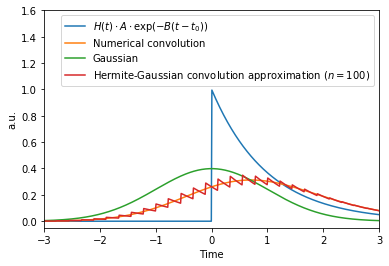

In [6]:
t0 = 0
sigma = 1
A, B = 1,1
convolved = np.convolve(i(t,t0,A,B),gauss(t,t0,sigma), mode="same") * dt
plt.plot(t, i(t, t0, A,B), label=r"$H(t) \cdot A\cdot\exp(-B(t-t_0))$")
plt.plot(t, convolved, label=r"Numerical convolution")
plt.plot(t, gauss(t, t0, sigma), label=r"Gaussian")
plt.plot(t, hermGauss(i, t, t0, sigma, t0, 1, 1), label="Hermite-Gaussian convolution approximation ($n=100$)")
plt.legend()
plt.ylim(-0.05,1.6)
plt.xlim(t0-3*sigma, t0+3*sigma)
plt.xlabel("Time")
plt.ylabel("a.u.")